In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
import scipy.stats as ss
from scipy.interpolate import interp1d
from scipy.special import expit
from fractions import Fraction
from empiricaldist import Pmf, Cdf
import matplotlib.pyplot as plt
from collections import Counter
import statsmodels.formula.api as smfa

In [2]:
from data.utils import update_binomial, make_dice, add_dist_seq, make_mixture

In [3]:
hypos = np.linspace(0, 1, 101)
prior = Pmf(1, hypos)
data = 140, 250
k, n = data
posterior = update_binomial(prior, data)

In [4]:
cdf = posterior.make_cdf()
# 함수 형태의 소괄호를 사용하면 interpolation을 해주는 형태, quantile은 그 역의 형태
cdf(0.615), cdf.quantile(0.96183032)

(array(0.96383032), array(0.61))

In [5]:
cdf.credible_interval(0.9) == posterior.credible_interval(0.9)

array([ True,  True])

In [6]:
pmf = cdf.make_pmf()
np.allclose(pmf, posterior)

True

<AxesSubplot:>

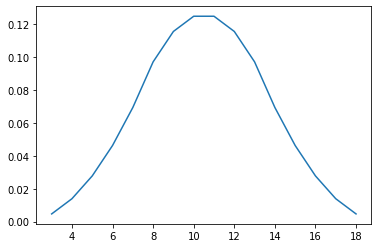

In [7]:
dice = make_dice(6)
pmf_3d6 = add_dist_seq([dice] * 3)
pmf_3d6.plot()

<AxesSubplot:>

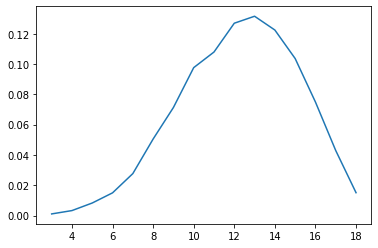

In [8]:
n = 10000
imsi = np.random.randint(1, 7, size=(n, 4))
imsi.sort(axis=1)
t = imsi[:, 1:].sum(axis=1)
pmf_best3 = Pmf.from_seq(t)
pmf_best3.plot()

<AxesSubplot:>

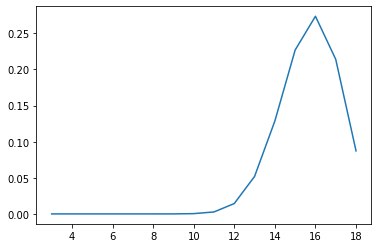

In [9]:
pmf_best3.max_dist(6).plot()

<AxesSubplot:>

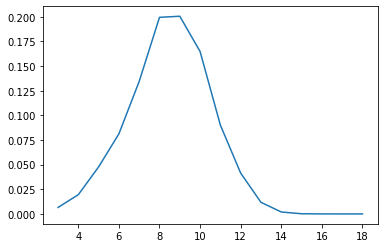

In [10]:
pmf_best3.min_dist(6).plot()

In [11]:
d4 = make_dice(4)
d6 = make_dice(6)

<AxesSubplot:>

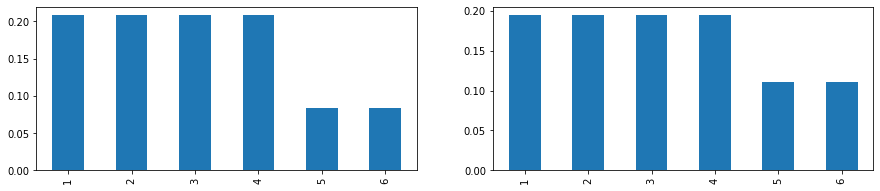

In [12]:
mix1 = (d4 + d6) / 2
mix2 = (d4 + 2 * d6) / 3
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 3))
mix1.plot.bar(ax=ax1)
mix2.plot.bar(ax=ax2)

In [13]:
hypos = [4, 6, 8]
counts = [1, 2, 3]
pmf_dice = Pmf(counts, hypos)
pmf_dice.normalize()
pmf_dice

,probs
4,0.166667
6,0.333333
8,0.500000


In [14]:
dice = [make_dice(sides) for sides in hypos]
df = pd.DataFrame(dice).fillna(0).T
df

,,,
1,0.25,0.166667,0.125
2,0.25,0.166667,0.125
3,0.25,0.166667,0.125
4,0.25,0.166667,0.125
5,0.00,0.166667,0.125
6,0.00,0.166667,0.125
7,0.00,0.000000,0.125
8,0.00,0.000000,0.125


In [15]:
(df * pmf_dice.ps).sum(axis=1)

1    0.159722
2    0.159722
3    0.159722
4    0.159722
5    0.118056
6    0.118056
7    0.062500
8    0.062500
dtype: float64

<AxesSubplot:>

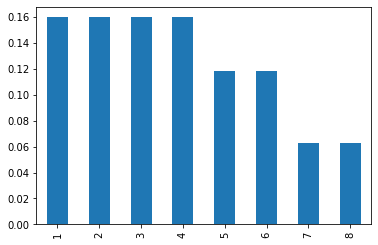

In [16]:
mix = make_mixture(pmf_dice, dice)
mix.plot.bar()